In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('UScomments.csv', on_bad_lines='skip')

<ipython-input-2-5cbdfee6f8f0>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('UScomments.csv', on_bad_lines='skip')


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


pandas have 2 data structures - 1-d series, 2-d data frame

whereas **series** ~ list, **data frame** ~ collection of lists 

In [3]:
comments = pd.read_csv('UScomments.csv', on_bad_lines='skip')

<ipython-input-3-ccc819aab8f9>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('UScomments.csv', on_bad_lines='skip')


In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Transforming data 

In [5]:
# check nulls
comments.isnull()

# False - not missing value
# True - missing value

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [6]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
comments.dropna(inplace=True) #inplace - replace df 

In [8]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Sentiment analysis - polarity [-1, 1]

closer to: -1 - negative, 0 - neutral, 1 - positive

In [9]:
!pip install -q textblob

In [10]:
from textblob import TextBlob


In [11]:
comments.head(8)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0


In [12]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️") # mamy instancje klasy TextBlob!

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [13]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

You can fetch a data sample

In [15]:
sample_df = comments[:10000]

In [16]:
sample_polarity = []

for comment in sample_df['comment_text']:
  try:
    sample_polarity.append(TextBlob(comment).sentiment.polarity)
  except:
    sample_polarity.append(0)


Blok try/except jest używany do obsługi wyjątków - jeśli jakiekolwiek błędy wystąpią podczas tworzenia obiektu TextBlob lub wywoływania metody sentiment.polarity (na przykład, jeśli komentarz jest pusty lub zawiera niepoprawne znaki), kod w bloku try wywoła wyjątek i blok except zostanie wykonany. W tym przypadku, gdy wystąpi wyjątek, do listy polarity jest dodawana wartość 0.

In [24]:
polarity = []

for comment in comments['comment_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
    polarity.append(0)


In [25]:
# adding a new feature

comments['polarity_value'] = polarity

In [26]:
comments.head(8)

,video_id,comment_text,likes,replies,polarity_value
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.0


# Word Cloud 

In [27]:
filter_1 = comments['polarity_value']==1

In [28]:
comments[filter_1]

,video_id,comment_text,likes,replies,polarity_value
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [29]:
comments_positive = comments[filter_1]

In [30]:
filter_2 = comments['polarity_value']==-1

In [31]:
comments_negative = comments[filter_2]

In [33]:
!pip install -q wordcloud

In [34]:
from wordcloud import WordCloud, STOPWORDS

set(STOPWORDS) tworzy zbiór słów stopu, gwarantując, że każde słowo występuje tylko raz. Jeśli STOPWORDS już jest zbiorem, to set(STOPWORDS) nie zmienia nic, ale jeśli STOPWORDS jest innym typem kolekcji, jak lista lub krotka, które mogą zawierać duplikaty, to set(STOPWORDS) usunie te duplikaty

In [ ]:
set(STOPWORDS)

In [36]:
comments['comment_text'] # rows in a series data structure 

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [37]:
type(comments['comment_text'])

pandas.core.series.Series

Parsing data into string data structure: 

In [40]:
''.join(comments_positive['comment_text'])

"yu are the bestPower is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :DThis is pricelessSummed up perfectlyThis is awesome. 1:20 XDDDDDDDDDBEST MOVIE EVER!!!Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.The greatest movie about the greatest movie.It's Harry guys he's Spiderman best friendBest remake ever!Great review!awesome vlogSubscribe to me if Roman Atwood is the best youtuberI was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever.The best part of the movie was the creditsDO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome.Please say uncle t

In [38]:
total_comments_positive = ''.join(comments_positive['comment_text'])

In [41]:
type(total_comments_positive)

str

In [45]:
word_cloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

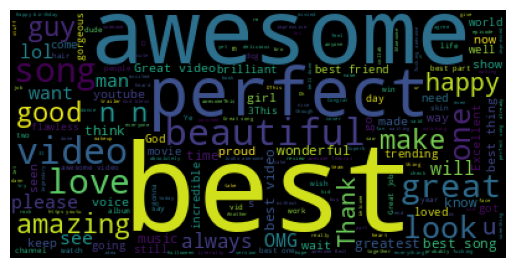

In [46]:
plt.imshow(word_cloud)
plt.axis('off')

In [47]:
total_comments_negative = ''.join(comments_negative['comment_text'])

In [48]:
word_cloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

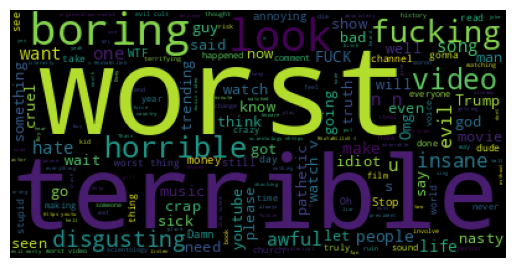

In [49]:
plt.imshow(word_cloud_negative)
plt.axis('off')

# Emojis Analysis